In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("driver-data.csv", index_col="id")
data.head()

,mean_dist_day,mean_over_speed_perc
id,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans = KMeans(n_clusters=3)

In [6]:
kmeans.fit(data)

KMeans(n_clusters=2)

In [7]:
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [8]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
import numpy as np

In [10]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [11]:
dict_data = dict(zip(unique, counts))
dict_data

{0: 3200, 1: 800}

In [12]:
import seaborn as sns

In [13]:
data["cluster"] = kmeans.labels_

C:\Users\djbud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\djbud\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


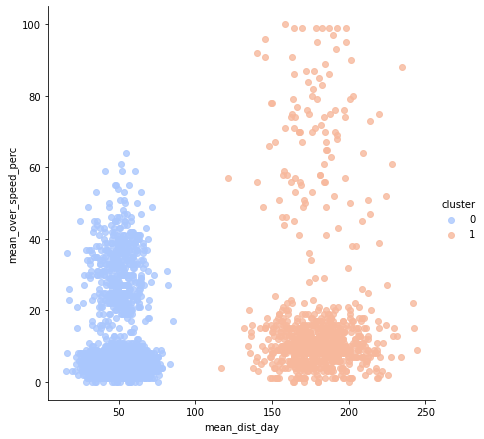

In [14]:
sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=data, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)

In [15]:
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

kmeans.inertia_

1316420.850947721

In [16]:
kmeans.score

<bound method KMeans.score of KMeans(n_clusters=2)>

In [17]:
data

,mean_dist_day,mean_over_speed_perc,cluster
id,,,
3423311935,71.24,28,0
3423313212,52.53,25,0
3423313724,64.54,27,0
3423311373,55.69,22,0
3423310999,54.58,25,0
...,...,...,...
3423310685,160.04,10,1
3423312600,176.17,5,1
3423312921,170.91,12,1
